## Testing Kalman filters

The first example is Kalman filter for VAR1 model 

In [18]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from KalmanFilter import VAR1_kalman_filter, VAR1_ml_fit, VAR1_em_fit
from numpy.linalg import cholesky, inv
from scipy.stats import norm

In [2]:
np.random.seed(1) # Fixing the seed

In [3]:
# Simulating the process

n_steps = 1000;

s_eps1 = 0.2; 
s_eps2 = 0.21;

s_eta1 = 0.3;
s_eta2 = 0.31;

rho_eps12 = 0.;
rho_eta12 = 0.4;

H = np.array([[s_eps1**2, rho_eps12*s_eps1*s_eps2], 
              [rho_eps12*s_eps1*s_eps2, s_eps2**2]]);

Q = np.array([[s_eta1**2, rho_eta12*s_eta1*s_eta2], 
              [rho_eta12*s_eta1*s_eta2, s_eta2**2]]);

yt = np.empty((n_steps, 2));
alpha = np.empty((n_steps+1, 2));

a0 = np.array([0, 0]);
P0 = np.eye(2);

alpha[0] = a0;

for i in np.arange(1, n_steps+1):
    
    alpha[i] = alpha[i-1] + np.random.multivariate_normal(np.array([0,0]), Q);
    yt[i-1] = alpha[i-1] + np.random.multivariate_normal(np.array([0,0]), H);

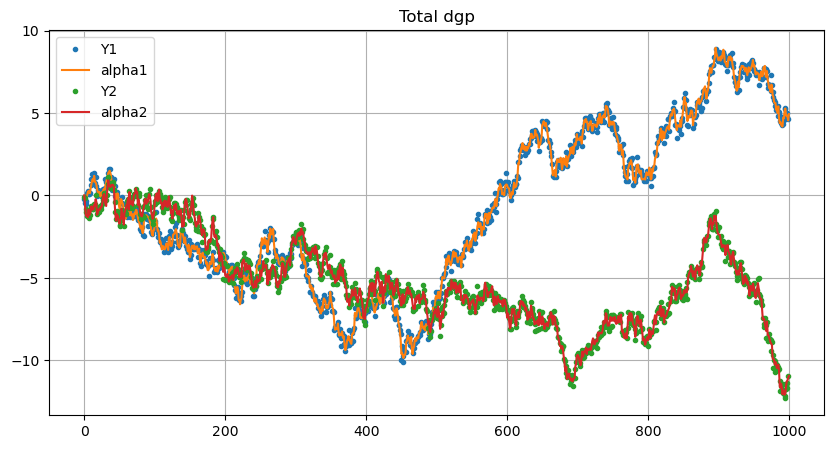

In [4]:
plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.legend(['Y1','alpha1', 'Y2','alpha2']);
plt.title('Total dgp');
plt.grid()
plt.show();

In [5]:
# Filtering 

A = np.eye(2)
Z = np.eye(2)
    
att, Ptt, at, Pt, x_smooth, V_smooth, Vt_smooth, loglike, vt, Ft = VAR1_kalman_filter(yt, A, Z, H, Q);
    

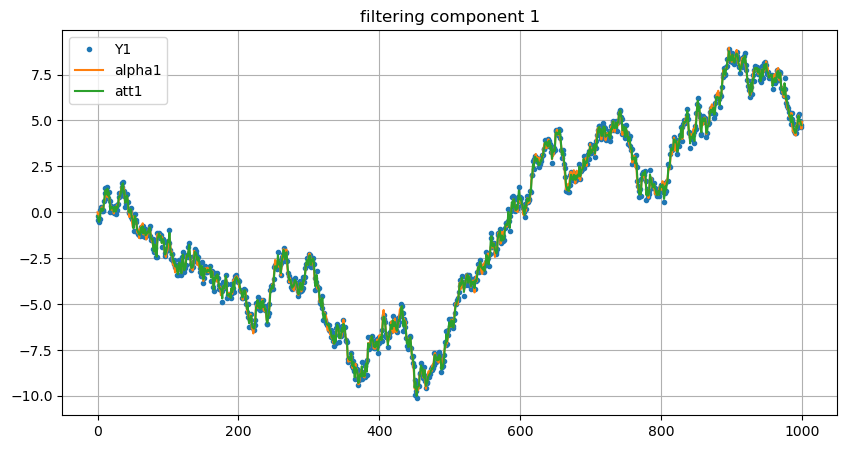

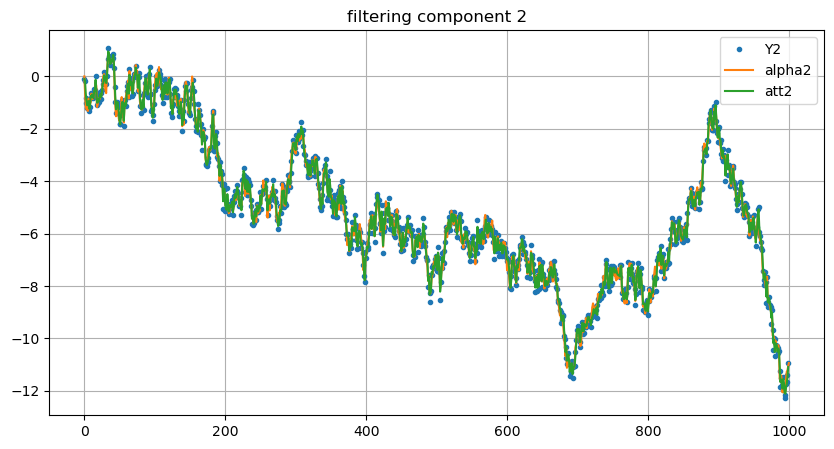

In [6]:
plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(att[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('filtering component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(att[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('filtering component 2');
plt.grid()
plt.show();

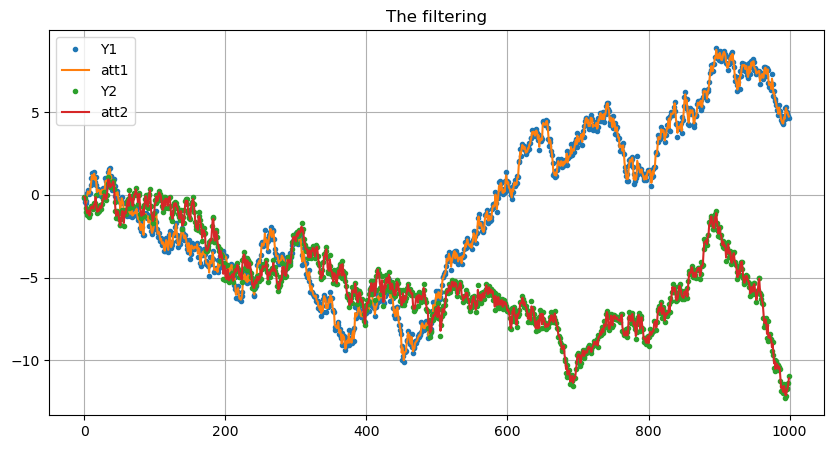

In [7]:
plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(att[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(att[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('The filtering');
plt.grid()
plt.show();

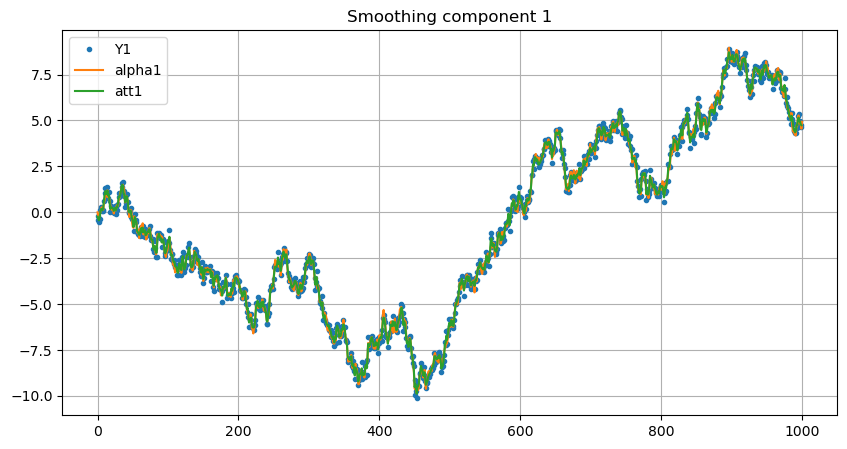

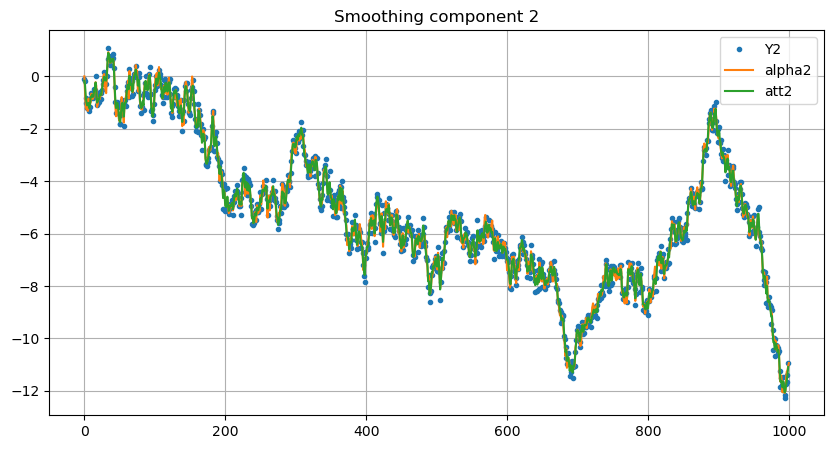

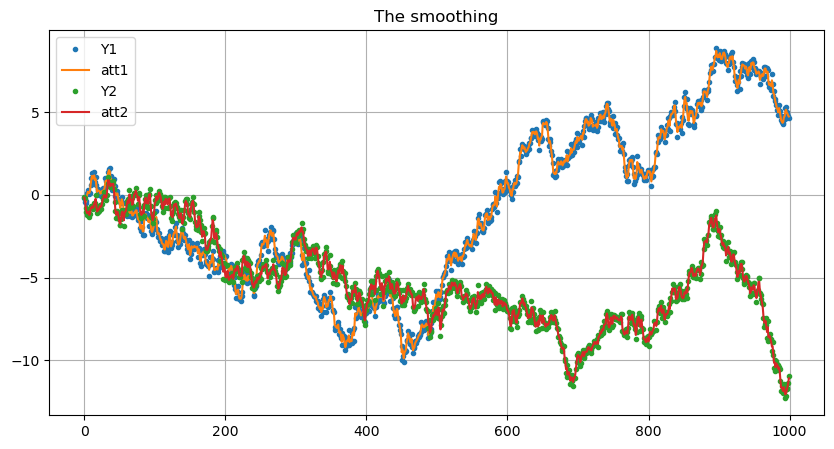

In [8]:
### Smoothing

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(x_smooth[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('Smoothing component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(x_smooth[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('Smoothing component 2');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(x_smooth[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(x_smooth[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('The smoothing');
plt.grid()
plt.show();


In [9]:
# ML fitting technique
    
params = np.array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

# print(obj_fun(params, yt))

start_time = time()
A_mlfit, H_mlfit, Q_mlfit = VAR1_ml_fit(params, yt)
end_time = time()

print(end_time-start_time)

att_mlfit, Ptt_mlfit, at_mlfit, Pt_mlfit, x_smooth_mlfit, V_smooth_mlfit, \
    Vt_smooth_mlfit, loglike_mlfit, vt_mlfit, Ft_mlfit \
        = VAR1_kalman_filter(yt, A_mlfit, Z, H_mlfit, Q_mlfit);

233.9349639415741


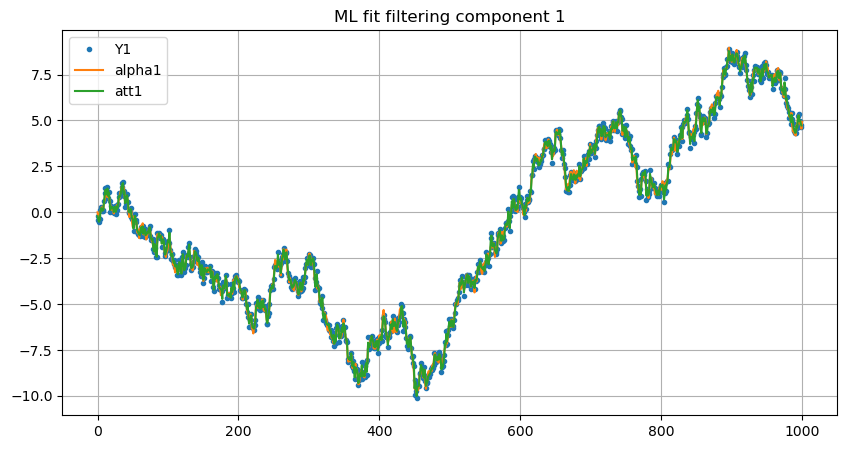

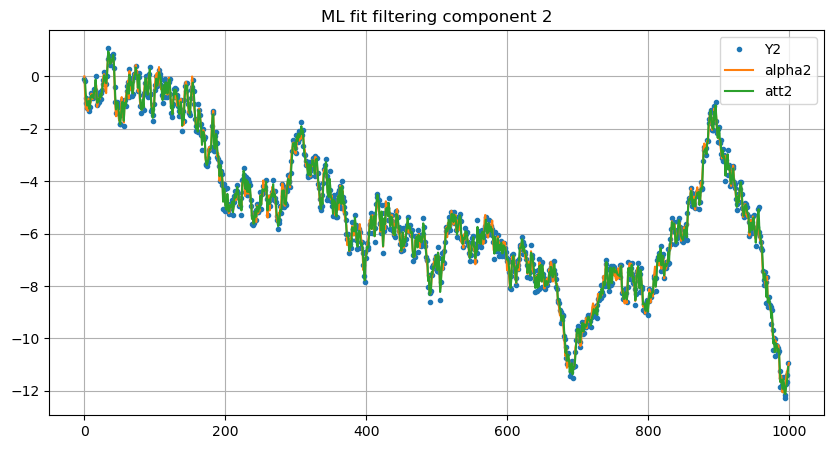

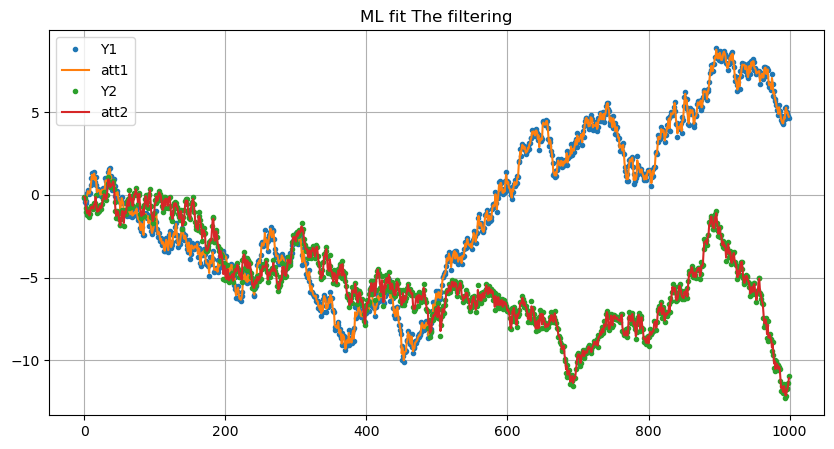

In [10]:
# Filtering

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(att_mlfit[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('ML fit filtering component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(att_mlfit[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('ML fit filtering component 2');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(att_mlfit[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(att_mlfit[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('ML fit The filtering');
plt.grid()
plt.show();

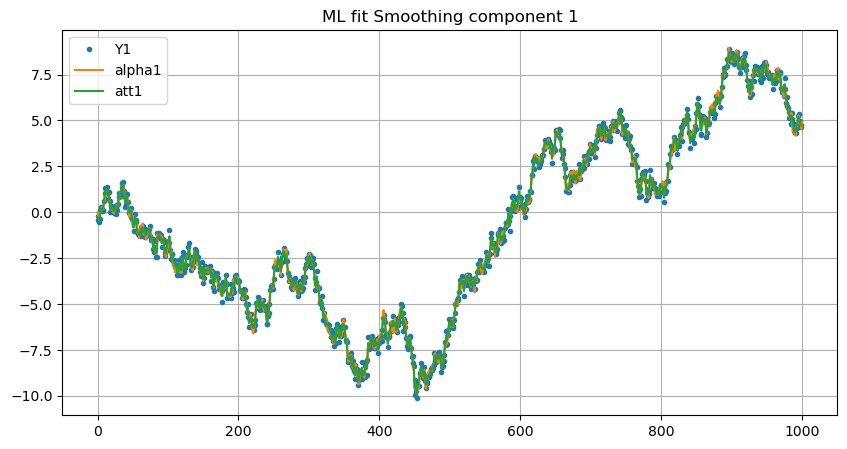

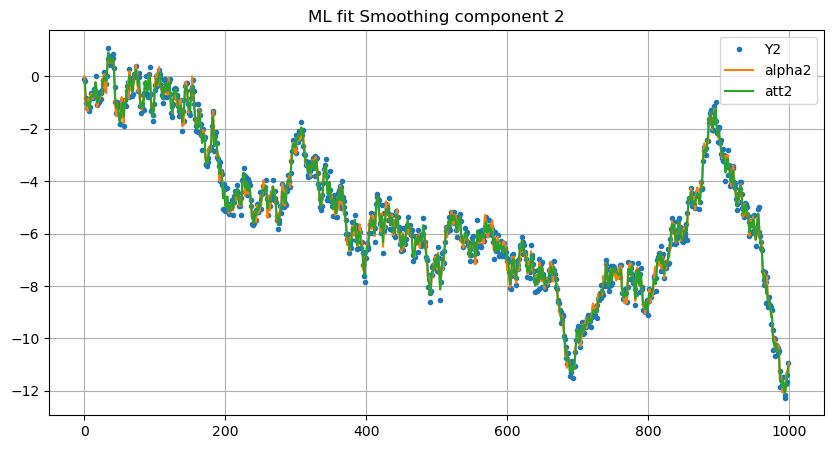

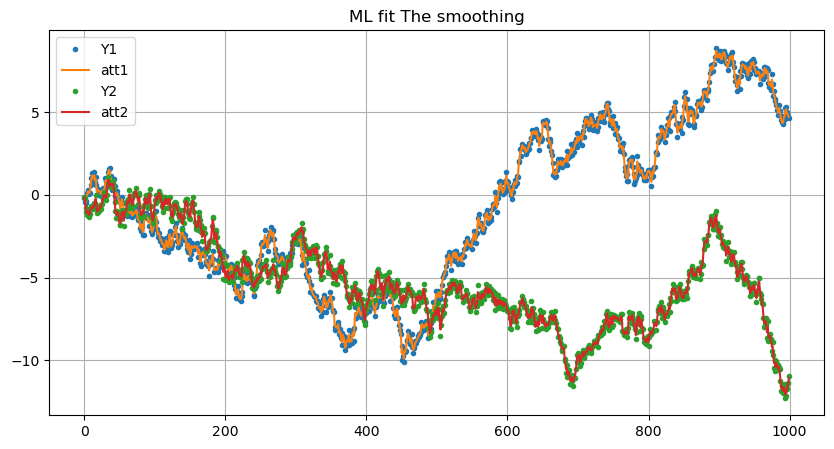

In [11]:
### Smoothing

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(x_smooth_mlfit[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('ML fit Smoothing component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(x_smooth_mlfit[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('ML fit Smoothing component 2');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(x_smooth_mlfit[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(x_smooth_mlfit[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('ML fit The smoothing');
plt.grid()
plt.show();

In [16]:
# Checking residuals 
    
standardized_residuals_mlfit = np.empty(np.shape(vt_mlfit))

for i in range(0, len(vt_mlfit)):
    
    v = np.reshape(vt_mlfit[i,:], (len(vt_mlfit[i]), 1))
    F = Ft_mlfit[i, :, :]
    
    standardized_residuals_mlfit[i] = (cholesky(inv(F)).T @ v).T

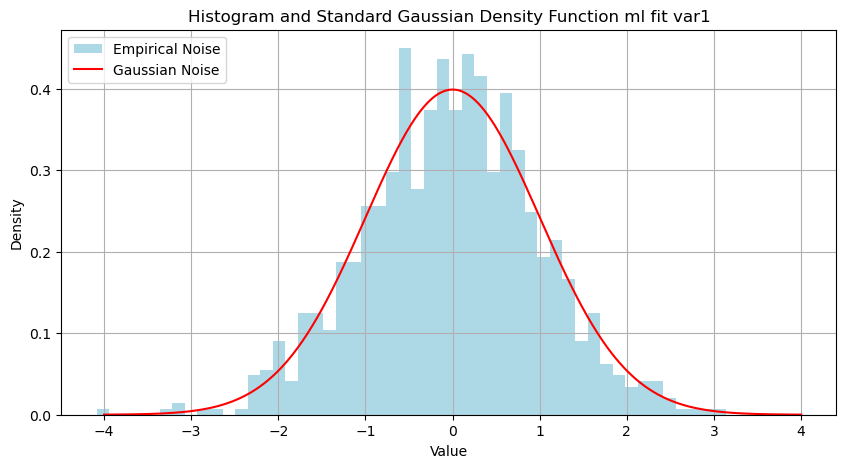

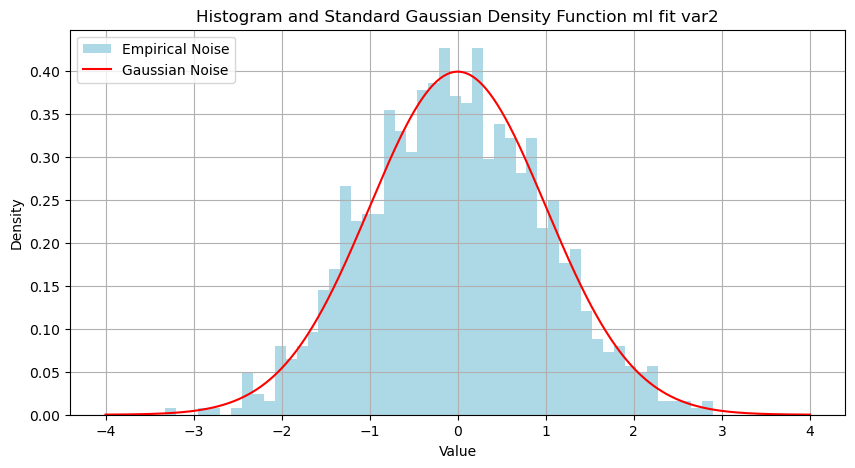

In [19]:
plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_mlfit[:,0], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function ml fit var1')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_mlfit[:,1], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function ml fit var2')
plt.legend(loc='upper left')
plt.show()

In [20]:
# Testing EM algorithm 

A0 = np.eye(2)
H0 = np.eye(2)
Q0 = np.eye(2)

# A0 = copy(A)
# H0 = copy(H)
# Q0 = copy(Q0)

start_time = time()
att_em, Ptt_em, at_em, Pt_em, x_smooth_em, V_smooth_em, Vt_smooth_em, loglike_em, vt_em, Ft_em, A_em, H_em, Q_em = VAR1_em_fit(A0, H0, Q0, yt, maxiter=1000, tol=10**-6)
end_time = time()

print(end_time-start_time)

243.0316140651703


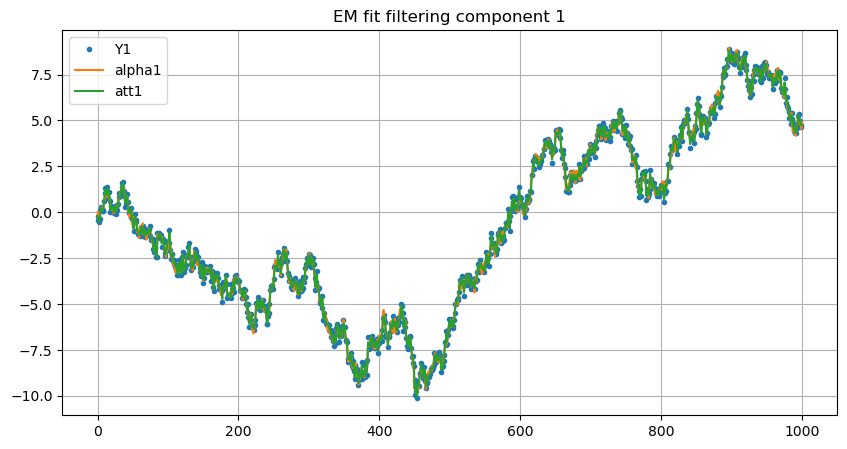

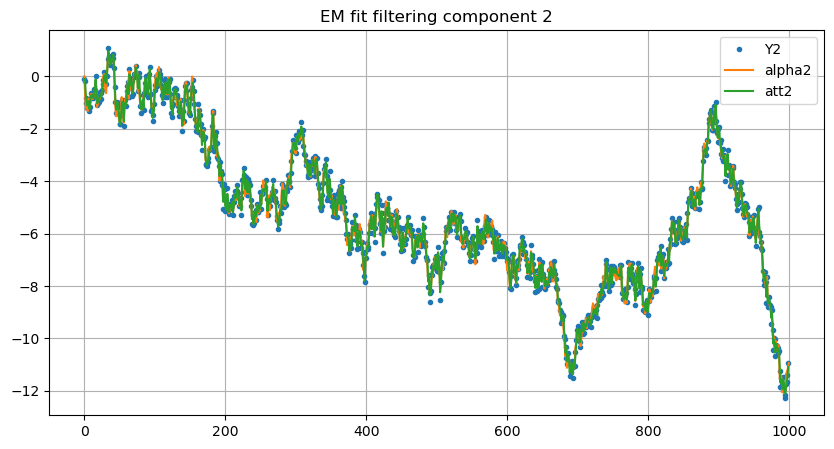

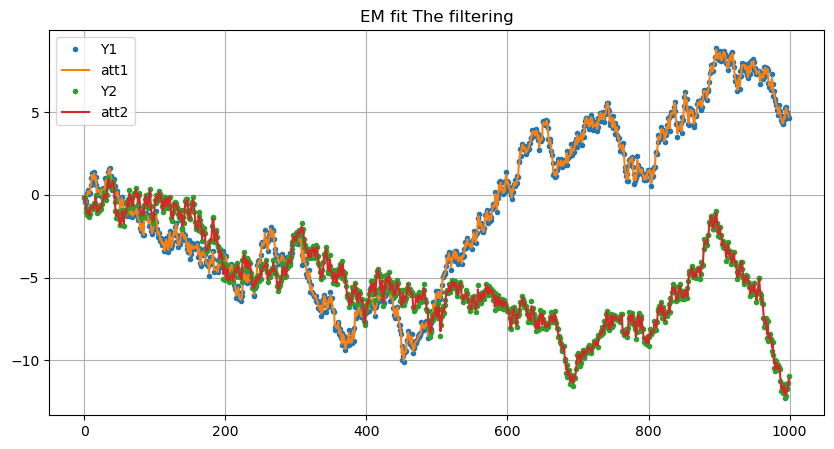

In [21]:
# Filtering

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(att_em[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('EM fit filtering component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(att_em[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('EM fit filtering component 2');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(att_em[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(att_em[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('EM fit The filtering');
plt.grid()
plt.show();
    

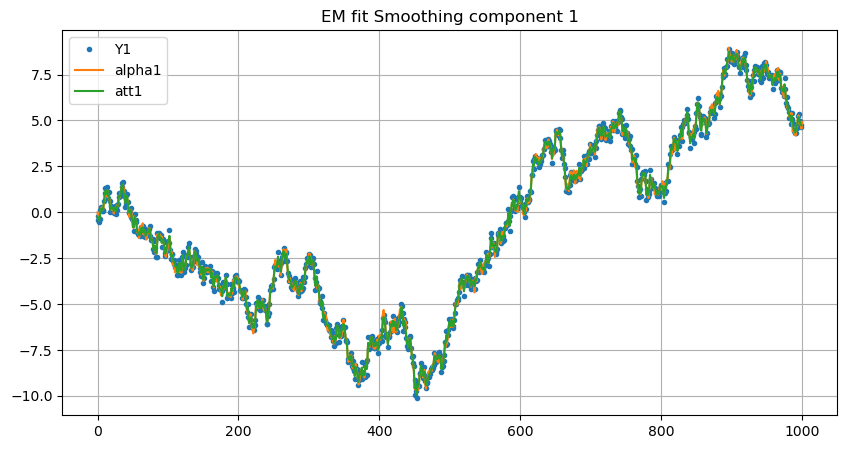

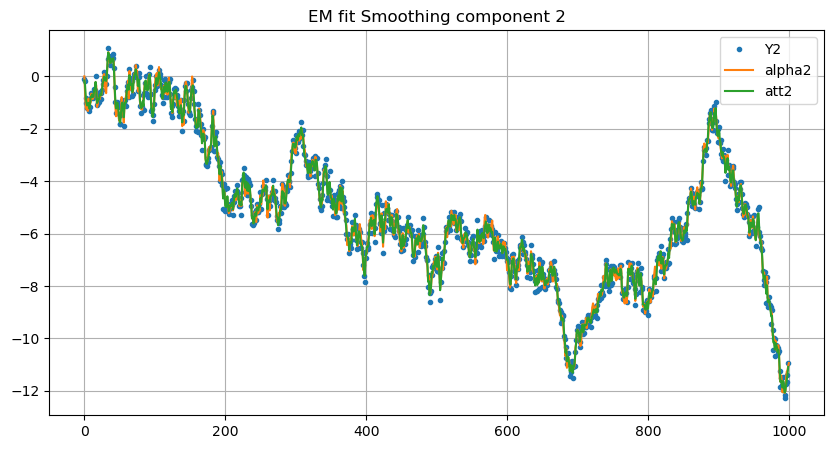

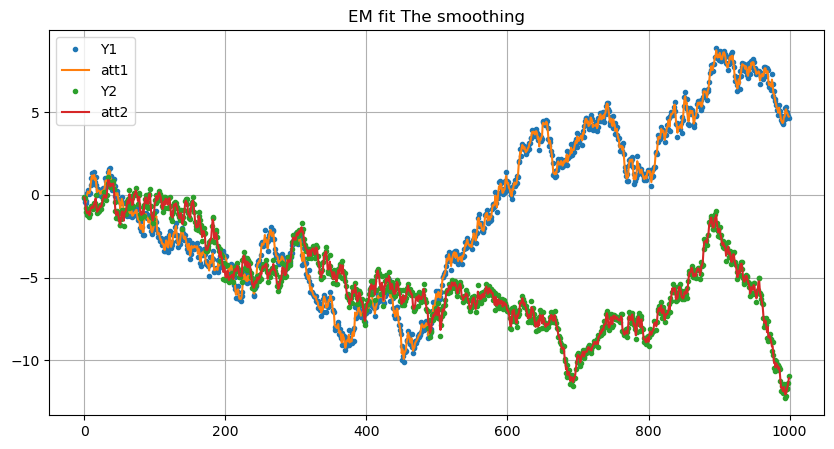

In [22]:
### Smoothing

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(alpha[:,0]);
plt.plot(x_smooth_em[:,0]);
plt.legend(['Y1','alpha1','att1']);
plt.title('EM fit Smoothing component 1');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,1], '.');
plt.plot(alpha[:,1]);
plt.plot(x_smooth_em[:,1]);
plt.legend(['Y2','alpha2','att2']);
plt.title('EM fit Smoothing component 2');
plt.grid()
plt.show();

plt.figure(figsize=(10,5))
plt.plot(yt[:,0], '.');
plt.plot(x_smooth_em[:,0]);
plt.plot(yt[:,1], '.');
plt.plot(x_smooth_em[:,1]);
plt.legend(['Y1','att1', 'Y2','att2']);
plt.title('EM fit The smoothing');
plt.grid()
plt.show();

In [23]:
# Checking residuals 
    
standardized_residuals_em = np.empty(np.shape(vt_em))

for i in range(0, len(vt_em)):
    
    v = np.reshape(vt_em[i,:], (len(vt_em[i]), 1))
    F = Ft_em[i, :, :]
    
    standardized_residuals_em[i] = (cholesky(inv(F)).T @ v).T

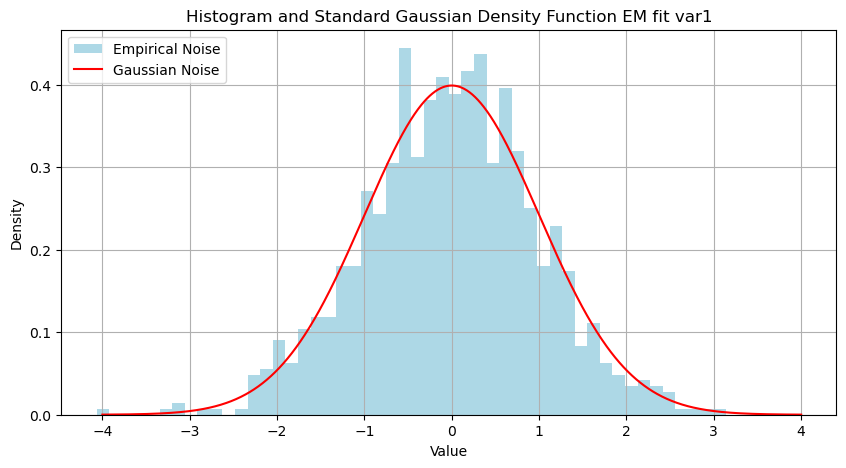

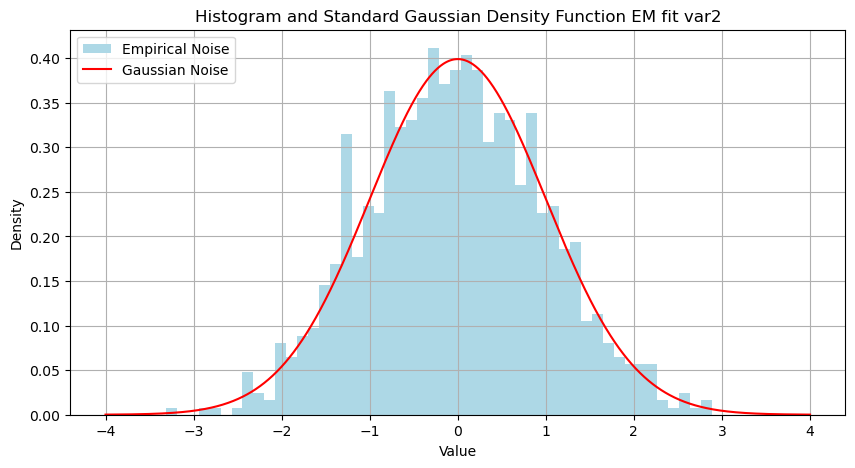

In [24]:
plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_em[:,0], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function EM fit var1')
plt.legend(loc='upper left')
plt.show()

plt.figure(figsize=(10,5))
plt.hist(standardized_residuals_em[:,1], bins=50, density=True, color='lightblue', label='Empirical Noise')
pdf = norm.pdf(np.linspace(-4, 4, n_steps), loc=0, scale=1)
plt.plot(np.linspace(-4, 4, n_steps), pdf, color='r', label='Gaussian Noise')
plt.grid()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram and Standard Gaussian Density Function EM fit var2')
plt.legend(loc='upper left')
plt.show()